# Anomaly Detection

Suppose you are working with an aircraft engine $x$ where you are concerned with two features $x_1$ which is heat generated by the engine and $x_2$ which is the number of vibrations produced. 

Let there be $m$ such engines so you have a dataset $\{x^1,x^2,x^3,...,x^m\}$ for which you have to monitor $x_1$ and $x_2$. Most of the engines produced are normal, i.e., they work fine without issues but there might be some engines in our dataset which may raise flag, so to find out if $x_{test}$ is going to raise a flag or not, we will plot these $x^i$ like the following and find the probability of each sample:

![Scatter plot.png](/workspaces/Unsupervised-Learning_Recommender-Systems_Reinforcement-Learning/Scatter plot.png)  

If our $x_test$ lie in 'least likely' part then we may have to recheck our engine for any anomaly detected. Mathematically, this would require us a threshold to be able to predict the likelihood of our probability of a sample. We will denote the threshold by $\epsilon$. 

## Applications of Anomaly Detection 

1. Fraud detection
For this, we probabilistically model our user's data, i.e., get an idea of the pages they visit, their times of logging in, typing speed, any personal data shared and then if $p(x)< \epsilon$, we may raise a flag.
2. Devices such as smartphones, switch boards, airplane engines, etc. 

# Gaussian Distribution

To model the probability distributions, we use normal distribution. If x_test is closer to the mean and has variance similar ro that of other points near our $x= \mu$, we may know that its likelihood is more and if it's farther away then it's likelihood is less and this raises the flag. 

Let us now work on the algorithm.

Training set $\{x^1,x^2, x^3, ...,x^m \}$
Each example $x^i$ has $n$ features. 
\[
p(x)=p(x_1)*p(x_2)*...*p(x_n)    
\]
We can write it in a more efficient way in terms of their $\mu$ and $\sigma^2$ as:
\[
p(x)=p(x_1;\mu_1,\sigma_1^2)*p(x_2;\mu_2,\sigma_2^2)*...*p(x_n;\mu_n,\sigma_n^2) = \prod_{i=1}^{n}p(x_i;\mu_i,\sigma_i^2) 
\]
We compute $\mu_j=\frac{1}{m}\sum_{i=1}^{n}x_j^{(i)}$ and $\sigma^2_j=\frac{1}{m}\sum_{i=1}{m}||x_j^i-\mu_j||$. 
Once we have the mean and variance of each feature, we plot a $n$ dimensional normal distribution and set a value for $\epsilon$.

Then, given $x_test$ with $n$ features, we compute its \[p(x)=\prod_{j=1}{n}\frac{1}{\sqrt{2\pi}\sigma_j}exp(\frac{-(x_j-\mu_j)^2}{2\sigma^2_j})\]

Using this $p(x)$ we see if it is $\geq \epsilon$ or $<\epsilon$ on the $n$ dimensional normal distribution to see whether to raise a flag or not. 

# How to choose the right kind of features? 
1. We prefer Gaussian features. 
2. We may try to make a feature more Gaussian by plotting its histogram over $m$ samples, and then we transform it by either using the logarithm of the feature instead of the feature or use feature$^{1/t}$ for some $t$, which makes it more Gaussian.
3. If there is a feature that is extremely low for all values and then there's a feature with very high values for all samples then we may take their ratio and call it a new feature, and perhaps, make modifications to it to see if its mean and variance form a Gaussian distribution or not. 

# Anomaly Detection v/s Supervised Learning
1. In anomaly detection we have a small pool of positive data (without any flag, y=1), and a large number of data is flagged (y=0). While in supervised learning, we have a large pool of positive and negative data. 
2. It is hard for an alogrithm to exactly predict whether something is an anomaly or not given that there are many types of anomalies. While in supervised learning, we have enough samples to know for sure how to classify things, i.e. there are clear boundaries. 
3. Example of anomaly detection: Fraud
Example of supervised learning classification: Spam

In [1]:
!pip install utils.py


[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: python -m pip install --upgrade pip


/tmp/ipykernel_3119/91122474.py:34: RuntimeWarning: invalid value encountered in scalar divide
  prec =  tp / (tp + fp)


Best Value of epsilon is: 2.7410007086379014
F1 ratio: 0.3529411764705882


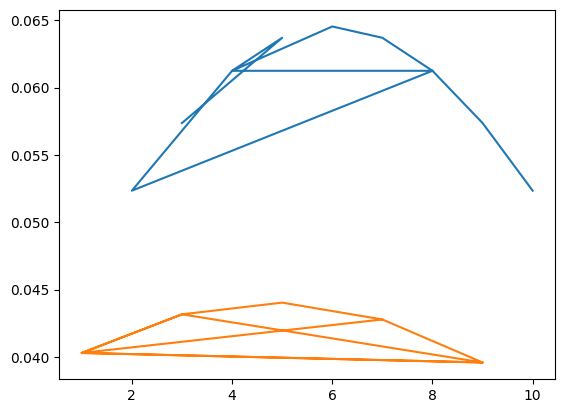

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics

# Suppose we have 5 samples with two features in each sample 
x = np.array([[10,1],[9,3],[8,5],[7,7],[6,9],[4,3],[2,1],[8,9],[4,1],[5,7],[3,7]])
# Suppose we are denoting anomaly as 1 and non-anomaly as 0
y = np.array([[0],[0],[1],[0],[1],[1],[0],[0],[0],[0],[0]])

# Finding mean and variance of each feature

mean = np.mean(x, axis=0)
var = (np.sum((x-mean)**2, axis = 0))/len(x)

# at each data point (row) of X_train
p = np.random.normal(mean, var)

best_epsilon = 0
best_F1 = 0
F1 = 0
    
step_size = np.abs(max(p) - min(p)) / 1000
    
for epsilon in np.arange(min(p), max(p), step_size):
    
        ### START CODE HERE ### 
        predictions = (p<epsilon)
        
        tp = np.sum((predictions == 1) & (y == 1))
        fp = np.sum((predictions == 1) & (y == 0))
        fn = np.sum((predictions == 0) & (y == 1))
        
        prec =  tp / (tp + fp)
        rec = tp/(tp+fn)
        
        F1 = (2 * prec * rec)/(prec+rec)
        
        ### END CODE HERE ### 
        
        if F1 > best_F1:
            best_F1 = F1
            if epsilon>0:
                best_epsilon = epsilon
        
print("Best Value of epsilon is: " +str(best_epsilon))
print("F1 ratio: "+str(best_F1))

# Find the outliers in the training set 
outliers = p < epsilon
  
plt.plot(x, norm.pdf(x, mean, var))

# # Draw a red circle around those outliers
# plt.plot(x[outliers, 0], x[outliers, 1], 'ro',
#          markersize= 10,markerfacecolor='none', markeredgewidth=2)

plt.show()

